<a href="https://colab.research.google.com/github/yuishimono/citrus_data/blob/master/%E6%9F%91%E6%A9%98%E9%A1%9E%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/MyDrive/柑橘類のデータ分析/src') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import re

In [ ]:
data_dir='../data'
input_dir=f'{data_dir}/input'
output_dir=f'{data_dir}/output'
citrus_file=f'{input_dir}/citrus.csv'

In [ ]:
df = pd.read_csv(citrus_file, encoding="shift-jis")

In [ ]:
df=df.replace(r'^\s+$', np.nan, regex=True)

In [ ]:
df['品目名'] = df['品目名'].ffill()

In [ ]:
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県
0,アマカ（あまか）,H13,5,17,16,NaN,愛媛（17）
1,アマカ（あまか）,14,7,47,45,NaN,愛媛（27） 香川（20）
2,アマカ（あまか）,15,10,119,111,3,愛媛（98） 香川（20） 佐賀（2）
3,アマカ（あまか）,16,11,127,118,6,愛媛（119） 熊本（6） 佐賀（2）
4,アマカ（あまか）,17,10,95,90,2,愛媛（94） 宮崎（1） 愛知
...,...,...,...,...,...,...,...
2884,レモン,27,475,"10,052","7,091","1,515","広島（6,350） 愛媛（2,022） 和歌山（543）"
2885,レモン,28,488,"8,459","6,334","1,343","広島（5,220） 愛媛（1,757） 和歌山（489）"
2886,レモン,29,524,"8,259","6,422","1,270","広島（4,790） 愛媛（1,897） 和歌山（580）"
2887,レモン,30,565,"7,089","5,528",985,"広島（3,570） 愛媛（1,850） 和歌山（656）"


In [ ]:
df=df.replace(',','', regex=True)

In [ ]:
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県
0,アマカ（あまか）,H13,5,17,16,NaN,愛媛（17）
1,アマカ（あまか）,14,7,47,45,NaN,愛媛（27） 香川（20）
2,アマカ（あまか）,15,10,119,111,3,愛媛（98） 香川（20） 佐賀（2）
3,アマカ（あまか）,16,11,127,118,6,愛媛（119） 熊本（6） 佐賀（2）
4,アマカ（あまか）,17,10,95,90,2,愛媛（94） 宮崎（1） 愛知
...,...,...,...,...,...,...,...
2884,レモン,27,475,10052,7091,1515,広島（6350） 愛媛（2022） 和歌山（543）
2885,レモン,28,488,8459,6334,1343,広島（5220） 愛媛（1757） 和歌山（489）
2886,レモン,29,524,8259,6422,1270,広島（4790） 愛媛（1897） 和歌山（580）
2887,レモン,30,565,7089,5528,985,広島（3570） 愛媛（1850） 和歌山（656）


In [ ]:
df['栽培面積'] = df['栽培面積'].astype(str).astype(float)
df['収穫量'] = pd.to_numeric(df['収穫量'], errors="coerce")
df['出荷量'] = pd.to_numeric(df['出荷量'], errors="coerce")
df['うち加工向け'] = pd.to_numeric(df['うち加工向け'], errors="coerce")
df.dtypes

品目名        object
年次         object
栽培面積      float64
収穫量       float64
出荷量       float64
うち加工向け    float64
主産県        object
dtype: object

＝＝＝ここから上は変更しない！＝＝＝

In [ ]:
display(df.describe())

,栽培面積,収穫量,出荷量,うち加工向け
count,2794.000000,2705.000000,2679.000000,1549.000000
mean,251.549069,2924.967763,2569.295931,705.638218
std,567.321479,7321.856492,6464.453918,2204.867657
min,0.100000,0.100000,0.100000,0.100000
25%,5.000000,34.000000,27.500000,7.000000
50%,36.000000,312.000000,265.000000,60.000000
75%,187.000000,2008.000000,1703.000000,416.000000
max,4250.000000,78089.000000,73526.000000,30912.000000


In [ ]:
df_viz=df[['品目名','出荷量']]
df_viz=df_viz.groupby('品目名',as_index=False).sum()

display(df_viz)

,品目名,出荷量
0,その他,0.0
1,はるひ,23.0
2,アマカ（あまか）,965.0
3,アマクサ（天草）,12695.0
4,アマポン（あまぽん）,10.0
...,...,...
140,（紅まどか）,196.0
141,（紅まどんな ほか）,19650.0
142,（花良治ミカン）,75.0
143,（辺塚ダイダイ）,788.0


In [ ]:
df_viz.sort_values(by="出荷量",ascending=False)

,品目名,出荷量
104,ポンカン,1053395.0
49,シラヌヒ（不知火）,728999.0
116,ユズ（柚）,575722.0
7,イヨカン（伊予柑）,567114.0
28,キヨミ（清見）,457038.0
...,...,...
53,スエナガオレンジ,0.0
46,シュンコウカン,0.0
25,キシュウミカン,0.0
21,カワバタ,0.0


In [ ]:
df['年次2']=df['年次'].str.replace('元','1')
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17
...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30


In [ ]:
df['年次3']= df['年次2'].str.replace('\d','')
display(df)

<ipython-input-79-97bc7ee1689b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['年次3']= df['年次2'].str.replace('\d','')


,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,H
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,
...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,


In [ ]:
df=df.replace(r'^\s*$', np.nan, regex=True)
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,H
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,NaN
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,NaN
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,NaN
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,NaN
...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,NaN
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,NaN
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,NaN
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,NaN


In [ ]:
df['年次3'] = df['年次3'].ffill()
display(df)


,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,H
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,H
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,H
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,H
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,H
...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,H
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,H
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,H
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,H


In [ ]:
df['年次3']= df['年次3'].str.replace('S','1925')
df['年次3']= df['年次3'].str.replace('H','1988')
df['年次3']= df['年次3'].str.replace('R','2018')
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,1988
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,1988
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,1988
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,1988
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,1988
...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,1988
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,1988
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,1988
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,1988


In [ ]:
df['年次4'] = df['年次2'].str.extract('(\d+)', expand=True)
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3,年次4
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,1988,13
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,1988,14
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,1988,15
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,1988,16
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,1988,17
...,...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,1988,27
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,1988,28
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,1988,29
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,1988,30


In [ ]:
df['年次3'] = pd.to_numeric(df['年次3'], errors="coerce")
df['年次4'] = pd.to_numeric(df['年次4'], errors="coerce")
df.dtypes

品目名        object
年次         object
栽培面積      float64
収穫量       float64
出荷量       float64
うち加工向け    float64
主産県        object
年次2       float64
年次3       float64
年次4       float64
dtype: object

In [ ]:
df['年次5'] = df['年次3']+df['年次4']
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3,年次4,年次5
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,NaN,1988.0,13.0,2001.0
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14.0,1988.0,14.0,2002.0
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15.0,1988.0,15.0,2003.0
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16.0,1988.0,16.0,2004.0
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17.0,1988.0,17.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27.0,1988.0,27.0,2015.0
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28.0,1988.0,28.0,2016.0
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29.0,1988.0,29.0,2017.0
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30.0,1988.0,30.0,2018.0


In [ ]:
df.to_csv(citrus_file,index=False)

In [ ]:
df['年次5']=(df['年次3'].str.cat(df['年次4']))
display(df)

,品目名,年次,栽培面積,収穫量,出荷量,うち加工向け,主産県,年次2,年次3,年次4,年次5
0,アマカ（あまか）,H13,5.0,17.0,16.0,NaN,愛媛（17）,H13,H,13,H13
1,アマカ（あまか）,14,7.0,47.0,45.0,NaN,愛媛（27） 香川（20）,14,H,14,H14
2,アマカ（あまか）,15,10.0,119.0,111.0,3.0,愛媛（98） 香川（20） 佐賀（2）,15,H,15,H15
3,アマカ（あまか）,16,11.0,127.0,118.0,6.0,愛媛（119） 熊本（6） 佐賀（2）,16,H,16,H16
4,アマカ（あまか）,17,10.0,95.0,90.0,2.0,愛媛（94） 宮崎（1） 愛知,17,H,17,H17
...,...,...,...,...,...,...,...,...,...,...,...
2884,レモン,27,475.0,10052.0,7091.0,1515.0,広島（6350） 愛媛（2022） 和歌山（543）,27,H,27,H27
2885,レモン,28,488.0,8459.0,6334.0,1343.0,広島（5220） 愛媛（1757） 和歌山（489）,28,H,28,H28
2886,レモン,29,524.0,8259.0,6422.0,1270.0,広島（4790） 愛媛（1897） 和歌山（580）,29,H,29,H29
2887,レモン,30,565.0,7089.0,5528.0,985.0,広島（3570） 愛媛（1850） 和歌山（656）,30,H,30,H30


年次のデータをなんとかしないといけない

In [ ]:
!pip install japanize_matplotlib
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=5c4ff9f0fbccc4a60aea5685e5f26f3d2ce0444d7369667631c09591d193fec8
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


<BarContainer object of 145 artists>

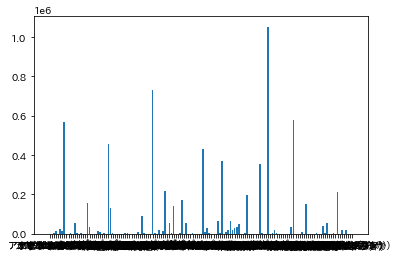

In [ ]:
plt.bar(df_viz['品目名'],df_viz['出荷量'])